In [1]:
%load_ext autoreload
%autoreload 2

from setup_func import *

import importlib
import decision_models.c_nobias_asymmetric_rw
import decision_models.d_lrbias_rw
import decision_models.e_betabias_rw
import decision_models.n_momentum_rw
import decision_models.o_add_rewbias_rw
from decision_models.utils import store_modout, model_comparison, model_comparison_for_paper

from pyEM.fitting import EMfit
# from pyEM.math import norm2alpha, norm2beta, alpha2norm, beta2norm, compGauss_ms
from pyEM import plotting

import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_summary = f'{data_dir}/clean_all_group_df_summary.csv'
path_to_longform = f'{data_dir}/clean_all_group_longform.csv'

summary_df = pd.read_csv(path_to_summary, index_col=0)
longform = pd.read_csv(path_to_longform, index_col=0)

alcohol_longform = longform[longform['Group'] == 'alcohol']
cannabis_longform = longform[longform['Group'] == 'cannabis']

In [3]:
batches = {
    'alcohol': None,
    'cannabis': None,
}

## EMFit for all alcohol data

In [4]:
modout = {}

save_fit_path=f'{results_dir}/decision/'
if not os.path.exists(save_fit_path):
    os.makedirs(save_fit_path)
if os.path.exists(f'{save_fit_path}/alcohol_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{save_fit_path}/alcohol_decision_models.pkl', 'rb') as f:
        modout = pickle.load(f)


Loading existing decision models


In [5]:
## Loop over blocks

for block in ['money', 'other']:
    # create a dict of lists with choices and rewards for each subject
    subj_dict = {
        'choices': [],
        'rewards': [],
        'craving_ratings': []
    }

    # Loop through each subject and add their choices and rewards and craving ratings to the dict
    for pid in alcohol_longform.PID.unique():
        subj_dict['choices'] += [np.array([alcohol_longform[
            (alcohol_longform.PID == pid)
            & (alcohol_longform.Type == block)
        ]['Action'].values])]
        subj_dict['rewards'] += [np.array([alcohol_longform[
            (alcohol_longform.PID == pid)
            & (alcohol_longform.Type == block)
        ]['Reward'].values])]
        subj_dict['craving_ratings'] += [np.array([alcohol_longform[
            (alcohol_longform.PID == pid)
            & (alcohol_longform.Type == block)
        ]['Craving Rating'].values])]

    # Create the all_data list of lists required for pyEM
    all_data = []
    for idx, (choices, rewards, craving_ratings) in enumerate(zip(subj_dict['choices'], subj_dict['rewards'], subj_dict['craving_ratings'])):
        all_data += [[choices, rewards, craving_ratings]]

    # Loop through each model and fit it to the data
    for model_name, param_names, fit_func in [
        (f'c_nobias_asymmetric_rw_{block}', ['beta', 'lr_pos', 'lr_neg'], decision_models.c_nobias_asymmetric_rw.fit),
        (f'd_lrbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.d_lrbias_rw.fit),
        (f'e_betabias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.e_betabias_rw.fit),
        (f'n_momentum_rw_{block}', ['beta', 'lr', 'mod', 'mom_lr'], decision_models.n_momentum_rw.fit),
        (f'o_add_rewbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.o_add_rewbias_rw.fit),
    ]:
        if model_name in modout:
            print(f'{model_name} already fit')
            continue

        print(f'Fitting {model_name} - {block.capitalize()} block')
        m, inv_h, posterior, NPL, NLPrior, NLL = EMfit(all_data, fit_func, param_names)
        modout = store_modout(
            modout, model_name, param_names, subj_dict, fit_func, 
            m, inv_h, posterior, NPL, NLPrior, NLL
        )


c_nobias_asymmetric_rw_money already fit
d_lrbias_rw_money already fit
e_betabias_rw_money already fit
n_momentum_rw_money already fit
o_add_rewbias_rw_money already fit
c_nobias_asymmetric_rw_other already fit
d_lrbias_rw_other already fit
e_betabias_rw_other already fit
n_momentum_rw_other already fit
o_add_rewbias_rw_other already fit


In [6]:
skipped_models = list(set([elem[:-6] for elem in modout.keys() if 'b_nobias' in elem or 'heuristic' in elem or 'decay' in elem or 'fictive' in elem or 'p_asymmetric' in elem or 'mult' in elem or 'm_rew' in elem]))
# skipped_models = ['a_heuristic']
mm = 1/25.4*4
fig_money, fig_other, df_money, df_other = model_comparison_for_paper(modout, 'alcohol', ic_type='bic', skip_models=skipped_models, figsize=(35*mm, 21*mm))
#save fig as svg
# fig_money.savefig(f'{figure_dir}/fig2_alcohol_decision_models_money.svg', format='svg', transparent=True, dpi=300)
# fig_other.savefig(f'{figure_dir}/fig2_alcohol_decision_models_other.svg', format='svg', transparent=True, dpi=300)
display(df_money)
display(df_other)

,Model,Type,IC,Delta-IC
0,c_nobias_asymmetric_rw,Money,3424.300958,11.453208
1,d_lrbias_rw,Money,3437.579083,24.731333
2,e_betabias_rw,Money,3484.175219,71.327469
3,n_momentum_rw,Money,3611.560244,198.712494
4,o_add_rewbias_rw,Money,3412.847750,0.000000


,Model,Type,IC,Delta-IC
0,c_nobias_asymmetric_rw,Other,3824.782579,35.328866
1,d_lrbias_rw,Other,3789.453713,0.000000
2,e_betabias_rw,Other,3839.745266,50.291553
3,n_momentum_rw,Other,3999.895433,210.441720
4,o_add_rewbias_rw,Other,3799.277296,9.823582


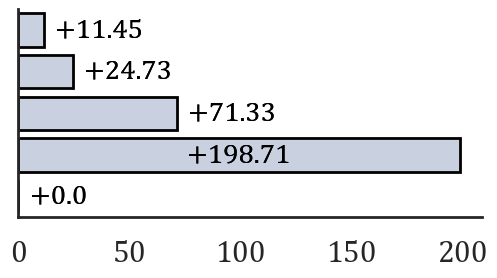

In [8]:
fig_money

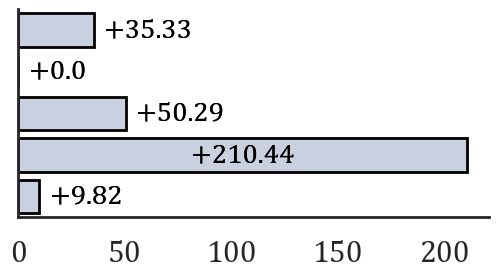

In [9]:
fig_other

## EMFit for all cannabis data

In [10]:
modout = {}

save_fit_path=f'{results_dir}/decision/'
if not os.path.exists(save_fit_path):
    os.makedirs(save_fit_path)
if os.path.exists(f'{save_fit_path}/cannabis_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{save_fit_path}/cannabis_decision_models.pkl', 'rb') as f:
        modout = pickle.load(f)


Loading existing decision models


In [11]:
## Loop over blocks

for block in ['money', 'other']:
    # create a dict of lists with choices and rewards for each subject
    subj_dict = {
        'choices': [],
        'rewards': [],
        'craving_ratings': []
    }

    # Loop through each subject and add their choices and rewards and craving ratings to the dict
    for pid in cannabis_longform.PID.unique():
        subj_dict['choices'] += [np.array([cannabis_longform[
            (cannabis_longform.PID == pid)
            & (cannabis_longform.Type == block)
        ]['Action'].values])]
        subj_dict['rewards'] += [np.array([cannabis_longform[
            (cannabis_longform.PID == pid)
            & (cannabis_longform.Type == block)
        ]['Reward'].values])]
        subj_dict['craving_ratings'] += [np.array([cannabis_longform[
            (cannabis_longform.PID == pid)
            & (cannabis_longform.Type == block)
        ]['Craving Rating'].values])]

    # Create the all_data list of lists required for pyEM
    all_data = []
    for idx, (choices, rewards, craving_ratings) in enumerate(zip(subj_dict['choices'], subj_dict['rewards'], subj_dict['craving_ratings'])):
        all_data += [[choices, rewards, craving_ratings]]

    # Loop through each model and fit it to the data
    for model_name, param_names, fit_func in [
        (f'c_nobias_asymmetric_rw_{block}', ['beta', 'lr_pos', 'lr_neg'], decision_models.c_nobias_asymmetric_rw.fit),
        (f'd_lrbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.d_lrbias_rw.fit),
        (f'e_betabias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.e_betabias_rw.fit),
        (f'n_momentum_rw_{block}', ['beta', 'lr', 'mod', 'mom_lr'], decision_models.n_momentum_rw.fit),
        (f'o_add_rewbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.o_add_rewbias_rw.fit),
    ]:
        if model_name in modout:
            print(f'{model_name} already fit')
            continue

        print(f'Fitting {model_name} - {block.capitalize()} block')
        m, inv_h, posterior, NPL, NLPrior, NLL = EMfit(all_data, fit_func, param_names)
        modout = store_modout(
            modout, model_name, param_names, subj_dict, fit_func, 
            m, inv_h, posterior, NPL, NLPrior, NLL
        )


c_nobias_asymmetric_rw_money already fit
d_lrbias_rw_money already fit
e_betabias_rw_money already fit
n_momentum_rw_money already fit
o_add_rewbias_rw_money already fit
c_nobias_asymmetric_rw_other already fit
d_lrbias_rw_other already fit
e_betabias_rw_other already fit
n_momentum_rw_other already fit
o_add_rewbias_rw_other already fit


In [12]:
skipped_models = list(set([elem[:-6] for elem in modout.keys() if 'b_nobias' in elem or 'heuristic' in elem or 'decay' in elem or 'fictive' in elem or 'p_asymmetric' in elem or 'mult' in elem or 'm_rew' in elem]))
fig_money, fig_other, df_money, df_other = model_comparison_for_paper(modout, 'cannabis', ic_type='bic', skip_models=skipped_models, figsize=(35*mm, 21*mm))
#save fig as svg
# fig_money.savefig(f'{figure_dir}/fig2_cannabis_decision_models_money.svg', format='svg', transparent=True, dpi=300)
# fig_other.savefig(f'{figure_dir}/fig2_cannabis_decision_models_other.svg', format='svg', transparent=True, dpi=300)
display(df_money)
display(df_other)

,Model,Type,IC,Delta-IC
0,c_nobias_asymmetric_rw,Money,3810.607860,10.966603
1,d_lrbias_rw,Money,3823.757101,24.115843
2,e_betabias_rw,Money,3831.984607,32.343349
3,n_momentum_rw,Money,4020.507369,220.866111
4,o_add_rewbias_rw,Money,3799.641258,0.000000


,Model,Type,IC,Delta-IC
0,c_nobias_asymmetric_rw,Other,3814.185016,91.044146
1,d_lrbias_rw,Other,3723.140870,0.000000
2,e_betabias_rw,Other,3761.902568,38.761698
3,n_momentum_rw,Other,3965.757049,242.616179
4,o_add_rewbias_rw,Other,3761.304769,38.163899


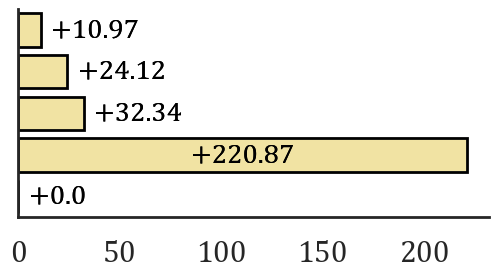

In [13]:
fig_money

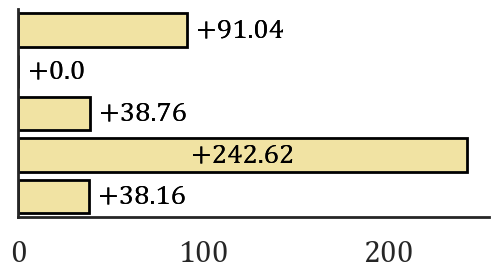

In [14]:
fig_other